# 예제 1

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([[150, 50], [160, 60], [165, 65], [170, 70], [180, 80], [185, 85]])
y = np.array([0, 1, 1, 2, 2, 2])

In [3]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [4]:
rf_clf.predict([[170,63]])

array([1])

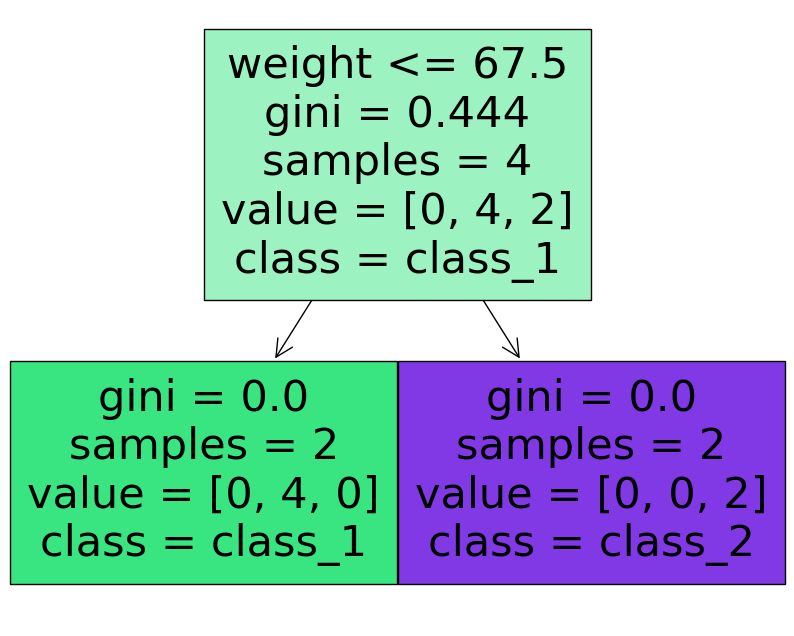

In [5]:
rf_clf1 = rf_clf.estimators_[0]   # 랜덤포레스트 중 첫번째 의사결정나무
plt.figure(figsize = (10, 8))
plot_tree(rf_clf1, filled = True, feature_names=['height', 'weight'],
          class_names=['class_0', 'class_1', 'class_2'])
plt.show()


# 예제2

In [6]:
import sklearn.datasets as d
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

유방암 진단 분류 모델

In [7]:
x = d.load_breast_cancer()
df = pd.DataFrame(data = x.data, columns = x.feature_names)
df['target'] = x.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

## RandomForest 학습

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
rf_clf = RandomForestClassifier(random_state = 42) 
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# 학습 내용으로 y_train 예측값
y_train_pred = rf_clf.predict(X_train)

# 학습 내용으로 test데이터를 통한 y_test 예측값
y_pred = rf_clf.predict(X_test)

In [12]:
# 평가
import sklearn.metrics as mt

print('Train_Accuracy: ', rf_clf.score(X_train, y_train),'\n')

train_accuracy = mt.accuracy_score(y_train, y_train_pred)
train_recall = mt.recall_score(y_train, y_train_pred)
train_precision = mt.precision_score(y_train, y_train_pred)
train_f1_score = mt.f1_score(y_train, y_train_pred)
train_matrix = mt.confusion_matrix(y_train, y_train_pred)

print('Accuracy: ', format(train_accuracy, '.2f'), '\n')
print('Recall: ', format(train_recall, '.2f'), '\n')
print('Precision: ', format(train_precision, '.2f'), '\n')
print('f1_Score: ', format(train_f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', train_matrix)

Train_Accuracy:  1.0 

Accuracy:  1.00 

Recall:  1.00 

Precision:  1.00 

f1_Score:  1.00 

Confusion_matrix:  
 [[149   0]
 [  0 249]]


In [13]:
accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy, '.2f'), '\n')
print('Recall: ', format(recall, '.2f'), '\n')
print('Precision: ', format(precision, '.2f'), '\n')
print('f1_Score: ', format(f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', matrix)

Accuracy:  0.97 

Recall:  0.99 

Precision:  0.96 

f1_Score:  0.98 

Confusion_matrix:  
 [[ 59   4]
 [  1 107]]


교차검증

In [14]:
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴더의 스코어
scores = cross_val_score(rf_clf, X, y, cv = 5)
print(scores)

print('교차 검증 평균 : ', scores.mean())

[0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
교차 검증 평균 :  0.9560937742586555


In [15]:
pd.DataFrame(cross_validate(rf_clf, X, y, cv = 5))

,fit_time,score_time,test_score
0,1.017277,0.069814,0.921053
1,0.939486,0.081782,0.938596
2,0.811828,0.045878,0.982456
3,0.867679,0.033911,0.964912
4,0.898596,0.056848,0.973451


## 하이퍼 파라미터 튜닝

- n_estimators: 생성할 트리 개수
    - 트리의 개수가 많을수록 앙상블 모델의 성능이 향상될 수 있지만, 계산 비용도 증가
    - 트리 개수가 일정 수 이상이면 결과의 향상이 크게 나타나지 않음

- max_leaf_nodes: 생성될 수 있는 최대 리프 노드의 개수를 제한 (int, default=None)
    - 일반적으로 랜덤 포레스트의 트리는 자라다가 가능한 한 많은 리프 노드를 생성하려는 경향이 있습니다.
    - 그러나 max_leaf_nodes를 설정함으로써 트리의 성장을 제한할 수 있습니다.
    - max_leaf_nodes를 지정하면 트리는 해당 개수 이상의 리프 노드를 생성하지 않습니다.
    - 이를 통해 과적합을 방지하고, 일반화 능력을 향상시킬 수 있습니다.
    - 작은 max_leaf_nodes 값은 모델의 단순성을 증가시키고 편향을 높일 수 있습니다. 

In [17]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state = 42)
# parameters = {'max_depth': [3, 5, 7],
#               'min_samples_split': [3, 5],
#               'splitter': ['best', 'random']}

parameters = {'n_estimators' : [70],
            #   'max_samples' : [],
              'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None]}


grid_dt = GridSearchCV(rf_clf, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [3, 5, 7, 9, 11, 13],
                         'n_estimators': [70]})

In [18]:
grid_dt.cv_results_['mean_test_score']

array([0.94974684, 0.94974684, 0.94721519, ..., 0.94971519, 0.94971519,
       0.94971519])

In [20]:
result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']  # fold 5개의 평균
result.sort_values(by='mean_test_score', ascending=False)

,class_weight,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,mean_test_score
714,balanced,entropy,5,log2,1,3,70,0.962247
1388,None,gini,9,auto,1,7,70,0.959778
1430,None,gini,9,sqrt,1,7,70,0.959778
463,balanced,gini,9,log2,1,5,70,0.959747
1431,None,gini,9,sqrt,1,9,70,0.957278
...,...,...,...,...,...,...,...,...
526,balanced,entropy,3,auto,7,11,70,0.929684
566,balanced,entropy,3,sqrt,7,7,70,0.929684
565,balanced,entropy,3,sqrt,7,5,70,0.929684
522,balanced,entropy,3,auto,7,3,70,0.929684


In [22]:
best_rf = grid_dt.best_estimator_
best_rf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='log2', min_samples_split=3,
                       n_estimators=70, random_state=42)

In [24]:
best_rf.feature_importances_

array([0.03594407, 0.01965429, 0.07082593, 0.03861862, 0.00449331,
       0.0179436 , 0.09284193, 0.10891558, 0.00328771, 0.01062064,
       0.01022634, 0.00716283, 0.00886423, 0.03173202, 0.00745096,
       0.00608386, 0.01385476, 0.00735038, 0.00691958, 0.0082657 ,
       0.08347173, 0.02465822, 0.0725149 , 0.08952079, 0.01145274,
       0.0264681 , 0.04870496, 0.11048877, 0.01456999, 0.00709346])

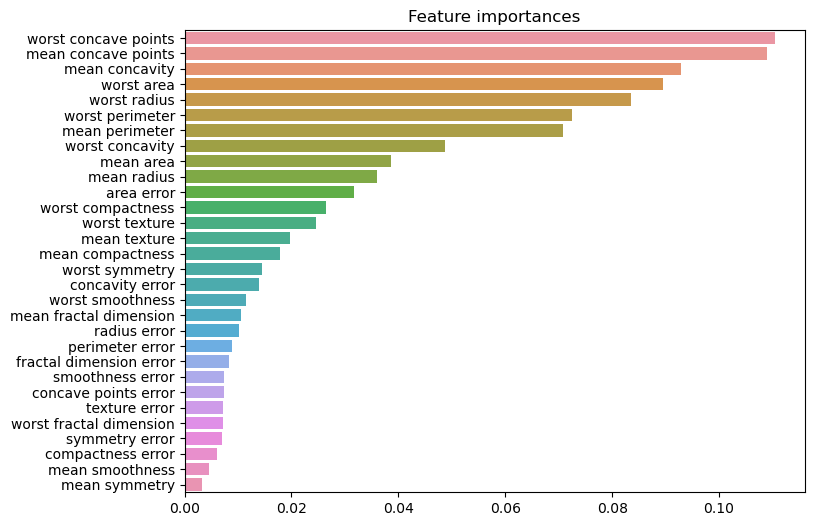

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = best_rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()